# Pandas notes

### Based on the book _Pandas in action_ book

In [1]:
import pandas as pd
import numpy as np

### Chapter 6 (Working with Text Data)


### Notes
* We can apply any string function on a data frames's column, by addressing the column as `df['col_a'].str`
* The column on which you apply the `str` must be a `string` type

In [2]:
# To read a CSV file
import pandas as pd
import numpy as np
inspections = pd.read_csv("./datasets/pandas-in-action-master/Chapter 06 - Working with Text Data/chicago_food_inspections.csv")

In [3]:
inspections.head()

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JET'S PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)


In [4]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    153810 non-null  object
 1   Risk    153744 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
inspections.nunique()

Name    92553
Risk        4
dtype: int64

In [6]:
inspections["Risk"] = inspections["Risk"].astype("category")
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Name    153810 non-null  object  
 1   Risk    153744 non-null  category
dtypes: category(1), object(1)
memory usage: 1.3+ MB


### OBSERVE 
Observe that we saved 1 MB of space converting the Risk to a `"category"` column. We converted this as there are just 4 unique values in the `Risk` column.

#### Strip the white spaces
* You can use `lstrip()`, `rstrip()` and `strip()` to strip (any character, default being space) from the left or right or both sides of a string respectively

In [12]:
s = "   sekhar "
print(f'Before strip: {s}')
print(f'Applying lstrip(): {s.lstrip()}')
print(f'Applying rstrip(): {s.rstrip()}')
print(f'Applying strip: {s.strip()}')

Before strip:    sekhar 
Applying lstrip(): sekhar 
Applying rstrip():    sekhar
Applying strip: sekhar


### Extract the columns based on the data type
* First identify all the types of columns in your dataset using the following command:
```
list(set(df.dtypes))
```
* Use `select_dtypes()` can be used to select columns based on the data type.
* To get the list of all columns which are categorical, use `df.select_dtypes([object])`
* To get the list of all numeric columns use `df.select_dtypes([float64, int64])`

In [26]:
list(set(inspections.dtypes))

[dtype('O')]

### Applying string operations in a loop

In [16]:
# Applying strip() to all the values of the Name and Risk columns
inspections["Name"] = inspections["Name"].str.strip()
inspections["Risk"] = inspections["Risk"].str.strip()

But this method of applying to each column of the data frame will become cumbersome. Let us automate this process...

In [27]:
# Get the list of columns which are categorical
list(set(inspections.dtypes))

[dtype('O')]

In [30]:
cat_cols = inspections.select_dtypes(['O']).columns

In [31]:
for col in cat_cols:
    inspections[col] = inspections[col].str.strip()
    

In [32]:
inspections.head()

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JET'S PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)


### Useful string functions
* `s.strip()`
* `s.upper()`
* `s.lower()`
* `s.replace()`
* `s[::-1]` (to reverse a string)
* The `+` and `*` operator of string
* The format `f'...{<variable>}'`
* `chr()` to convert ASCII value to the character
* `ord()` to get the ASCII value of a character
* `s.split()` to split the string by a set of characters
* `s.startswith()`
* `s.endswith()`

### `replace()`
* To replace a value in a series or column (based on a condition), we can use something like the following:
`df.loc[condition, column] = value`
* To replace a value irrespective of the condition we can also use `df['col-a'].replace(to_replace="val-1", value="to be replaced", inplace=True)`
* We can also replace a value with another value in a data frame irrespective of the column where the value is found
* Remember `replace()` to replace a spectfic value in the data frame irrespective of the column. But to replace the data based on a condition it's better use `df.loc[..., ...] = value` method.


In [51]:
df = pd.DataFrame({'a':[1,2,2,3], 'b':[1,1,2,5]})
df

,a,b
0,1,1
1,2,1
2,2,2
3,3,5


In [52]:
df.replace(to_replace=1, value=10)

,a,b
0,10,10
1,2,10
2,2,2
3,3,5


In [53]:
df['a'].replace(to_replace=1, value=10)

0    10
1     2
2     2
3     3
Name: a, dtype: int64

### Exercise
Extract the numeric value in the `Risk` column. For example, if the value of the column is `Risk 1 (High)`, then we should extract the `1`. Let us find how many different counts we have for each level in the `Risk` column. 

We will use `value_counts()` with `dropna=False` option. This will also count the number of nulls in the column.

In [8]:
# Get the counts of levels in the Risk column
inspections['Risk'].value_counts()

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
NaN                    66
All                    19
Name: Risk, dtype: int64

In [55]:
# Count the nulls also
inspections['Risk'].value_counts(dropna=False)

Risk 1 (High)       107351
Risk 2 (Medium)      31845
Risk 3 (Low)         14529
Risk 4 (Extreme)        19
Name: Risk, dtype: int64

In [56]:
# Replace All with "Risk 4 (Extreme)"
inspections.loc[inspections['Risk'] == "All", "Risk"] = "Risk 4 (Extreme)"
inspections['Risk'].value_counts()

Risk 1 (High)       107351
Risk 2 (Medium)      31845
Risk 3 (Low)         14529
Risk 4 (Extreme)        19
Name: Risk, dtype: int64

In [57]:
# Drop the columns wherever we have nulls in Risk Column
inspections.dropna(subset=["Risk"], inplace=True)

In [65]:
# EXTRACT THE RISK NUMBER
inspections["Risk"].str[5:6]

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153744, dtype: object

In [66]:
# Extract the High/Medium/Low/Extreme values from Risk column
inspections["Risk"].str[8:-1]

0           High
1         Medium
2            Low
3           High
4           High
           ...  
153805      High
153806    Medium
153807      High
153808      High
153809      High
Name: Risk, Length: 153744, dtype: object

### `str.get()` 
* When you apply split on a string you will ge a list of strings after splittingthe string by a character (default space)
* If you want to get a spectfic element out of the list, after splitting the string by space, use `df.str.get()`
* You can only get one element (using 0, 1, 2, ... -1, -2 etc)
* If nothing works out, just create a function that takes a Series as input, parses each element of the Series, and creates a list with the values. This list will be returned, after converting that to a Series object with the input Series's index.

In [76]:
inspections["Risk"].str.split().str.get(1)

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153744, dtype: object

In [9]:
inspections["Risk"].str.split().str.get(-1)

0           (High)
1         (Medium)
2            (Low)
3           (High)
4           (High)
            ...   
153805      (High)
153806    (Medium)
153807      (High)
153808      (High)
153809      (High)
Name: Risk, Length: 153810, dtype: object

In [11]:
inspections["Risk"].str.split().str.get(-2)

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153810, dtype: object

## Chapter - 8 (Reshaping and Pivoting)

* A dataset can store its values in either a wide or a narrow format.
* A wide format is great for seeing the aggregate picture, the complete story. In comparison, a narrow format makes it easier to manipulate existing data and to add new data.
* A pivot table can be used to transform a dataset from a narrow format to a wide format.
* We use `df.pivot_table()` to pivot a table (narrow to wide) 
* We use `df.melt()` to melt a table (wide to narrow)
* **REMEMBER**: 
         Pivot means NARROW TO WIDE
         Melt means WIDE TO NARROW

In [79]:
# Example of wide format:
df = pd.DataFrame({'Weekday': ['Monday', 'Tuesday'], "New York":[65, 70], "Miami": [100, 105]})
df

,Weekday,New York,Miami
0,Monday,65,100
1,Tuesday,70,105


In [80]:
# if you want to add more data (more cities), you have to extend the dataset horizontally, making it much wider
df["San Francisco"] = [85, 90]
df

,Weekday,New York,Miami,San Francisco
0,Monday,65,100,85
1,Tuesday,70,105,90


In [82]:
# But a Narrow dataset will grow vertically
df_narrow = pd.DataFrame({"Weekday":["Monday", "Tuesday", "Monday", "Tuesday", "Monday", "Tuesday"],
                         "City": ["New York", "New York", "Miami", "Miami", "San Francisco", "San Francisco"],
                         "Temperature":[65, 70, 100, 105, 85, 90]})
df_narrow

,Weekday,City,Temperature
0,Monday,New York,65
1,Tuesday,New York,70
2,Monday,Miami,100
3,Tuesday,Miami,105
4,Monday,San Francisco,85
5,Tuesday,San Francisco,90


### General format of `df.pivot_table()`
* `df.pivot_table()` will transform a data frame from narrow to wide data frame
* See the below example...where we are converting the `df_narrow` to a wider dataframe
* The `aggfunc` can be `"mean", "median", "sum", "std", "count"` (or any user defined function?)
* The `fill_value` option can be used to substitute a value for nulls. The pivot table can result in having nulls, and `fill_value` will fill in those values by the provided value.
* The `values` option can accept a list of columns.
* The `aggfunc` option can accept a list of aggregate functions.
* For each column in the `values`, each aggregate function (in `aggfunc`) is applied to get the aggregate values for each level of the column in the columns.

In [87]:
df_narrow.pivot_table(index="Weekday",
              columns="City",
              values="Temperature",
              aggfunc=["mean", "sum", "count"],
                     margins = True,
                     margins_name="Total")

mean                                     sum                         \
City     Miami New York San Francisco      Total Miami New York San Francisco   
Weekday                                                                         
Monday   100.0     65.0          85.0  83.333333   100       65            85   
Tuesday  105.0     70.0          90.0  88.333333   105       70            90   
Total    102.5     67.5          87.5  85.833333   205      135           175   

              count                               
City    Total Miami New York San Francisco Total  
Weekday                                           
Monday    250     1        1             1     3  
Tuesday   265     1        1             1     3  
Total     515     2        2             2     6

### General format of df.melt()¶
* It is used to make a wider table to a narrow table (opposite to pivot)
* The `id_vars` option will accept a column name or a list of column names (These are usually the categorical columns)
* The `value_vars` option will accept a list of columns which would be unpivot
* By default the `melt()` will narrow your data frame, and there will be 2 new columns: `variable` and `value`. The `variable` contains the columns used in the `value_vars` and the `value` contains the values of those columns. You can use `var_name` option to assign a customized name instead of `variable` name
* The option `value_name` can be used to assign a name to the `value` column

In [88]:
# To read a CSV file
video_games = pd.read_csv("./datasets/pandas-in-action-master/Chapter 08 - Reshaping and Pivoting/video_game_sales.csv")

In [93]:
video_games

,Name,NA,EU,JP,Other
0,Wii Sports,41.49,29.02,3.77,8.46
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.85,12.88,3.79,3.31
3,Wii Sports Resort,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16561,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.00
16562,Men in Black II: Alien Escape,0.01,0.00,0.00,0.00
16563,SCORE International Baja 1000: The Official Game,0.00,0.00,0.00,0.00
16564,Know How 2,0.00,0.01,0.00,0.00


In [96]:
# Let us Melt the above dataset. We will make the NA, EU, JP and Other as the Region column.
video_games.melt(id_vars="Name", value_vars=["NA", "EU", "JP", "Other"], var_name="Region", value_name="Sales")

,Name,Region,Sales
0,Wii Sports,NA,41.49
1,Super Mario Bros.,NA,29.08
2,Mario Kart Wii,NA,15.85
3,Wii Sports Resort,NA,15.75
4,Pokemon Red/Pokemon Blue,NA,11.27
...,...,...,...
66259,Woody Woodpecker in Crazy Castle 5,Other,0.00
66260,Men in Black II: Alien Escape,Other,0.00
66261,SCORE International Baja 1000: The Official Game,Other,0.00
66262,Know How 2,Other,0.00


### Exploding a list of values

In [97]:
# To read a CSV file
recipes = pd.read_csv("./datasets/pandas-in-action-master/Chapter 08 - Reshaping and Pivoting/recipes.csv")

In [98]:
recipes.head()

,Recipe,Ingredients
0,Cashew Crusted Chicken,"Apricot preserves, Dijon mustard, curry powder..."
1,Tomato Basil Salmon,"Salmon filets, basil, tomato, olive oil, Parme..."
2,Parmesan Cheese Chicken,"Bread crumbs, Parmesan cheese, Italian seasoni..."


Applying split on the `Ingredients`

In [100]:
recipes["Ingredients"] = recipes["Ingredients"].str.split(",")

In [101]:
recipes.head()

,Recipe,Ingredients
0,Cashew Crusted Chicken,"[Apricot preserves, Dijon mustard, curry pow..."
1,Tomato Basil Salmon,"[Salmon filets, basil, tomato, olive oil, ..."
2,Parmesan Cheese Chicken,"[Bread crumbs, Parmesan cheese, Italian seas..."


In [102]:
recipes.explode("Ingredients")

,Recipe,Ingredients
0,Cashew Crusted Chicken,Apricot preserves
0,Cashew Crusted Chicken,Dijon mustard
0,Cashew Crusted Chicken,curry powder
0,Cashew Crusted Chicken,chicken breasts
0,Cashew Crusted Chicken,cashews
1,Tomato Basil Salmon,Salmon filets
1,Tomato Basil Salmon,basil
1,Tomato Basil Salmon,tomato
1,Tomato Basil Salmon,olive oil
1,Tomato Basil Salmon,Parmesan cheese


### Stacking and Unstacking
* Stacking describes the process of moving an index level from the columns to the rows. 
* The `stack()` method adds the column's index to the row index.
* The `unstack()` method will move the row index to the column's index. It starts with the inner most row index (in case of multi-level index).
* Use `df.stack()` to perform stacking
* Use `df.unstack()` to perform unstacking. 
* The unstack method moves the innermost level of the row index to the column index.

### Exercises


In [106]:
# To read a CSV file
cars = pd.read_csv("./datasets/pandas-in-action-master/Chapter 08 - Reshaping and Pivoting/used_cars.csv")

wages = pd.read_csv("./datasets/pandas-in-action-master/Chapter 08 - Reshaping and Pivoting/minimum_wage.csv")

In [105]:
cars.head()

,Manufacturer,Year,Fuel,Transmission,Price
0,Acura,2012,Gas,Automatic,10299
1,Jaguar,2011,Gas,Automatic,9500
2,Honda,2004,Gas,Automatic,3995
3,Chevrolet,2016,Gas,Automatic,41988
4,Kia,2015,Gas,Automatic,12995


In [107]:
wages.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Alaska,8.90,8.63,8.45,8.33,8.20,9.24,10.17,10.01
2,Arizona,8.33,8.18,8.34,8.38,8.36,8.50,8.40,10.22
3,Arkansas,7.18,6.96,6.82,6.72,6.61,7.92,8.35,8.68
4,California,9.19,8.91,8.72,8.60,9.52,9.51,10.43,10.22


### Questions
Here are the challenges:
1. In the cars dataset, aggregate the sum of prices across all cars, organized by the fuel type on the index axis.
2. In the cars dataset, aggregate the count of cars, organized by the manufacturer on the index axis and the transmission type on the column axis. Show the subtotals for both the rows and columns.
3. In the cars dataset, aggregate the mean of prices across the cars, organized by both the year and the fuel type on the index axis and the transmission type on the column axis.
4. Given a DataFrame with the data from the previous bullet, move the transmission type level from the column axis to the row axis.
5. In the min_wage dataset, convert the data from a "wide" format to a "narrow" format. In other words, how can you move all of the data from the 8 year columns into a single column

**1. In the cars dataset, aggregate the sum of prices across all cars, organized by the fuel type on the index axis.**

In [111]:
cars.pivot_table(index="Fuel",
                aggfunc="sum",
                values="Price")

,Price
Fuel,
Diesel,986177143
Electric,18502957
Gas,86203853926
Hybrid,44926064
Other,242096286


In [112]:
# another method
cars.groupby("Fuel").agg({"Price":"sum"})

,Price
Fuel,
Diesel,986177143
Electric,18502957
Gas,86203853926
Hybrid,44926064
Other,242096286


**2. In the cars dataset, aggregate the count of cars, organized by the manufacturer on the index axis and the transmission type on the column axis. Show the subtotals for both the rows and columns.**

In [113]:
cars

,Manufacturer,Year,Fuel,Transmission,Price
0,Acura,2012,Gas,Automatic,10299
1,Jaguar,2011,Gas,Automatic,9500
2,Honda,2004,Gas,Automatic,3995
3,Chevrolet,2016,Gas,Automatic,41988
4,Kia,2015,Gas,Automatic,12995
...,...,...,...,...,...
460461,Rover,2008,Gas,Automatic,7950
460462,Nissan,2016,Gas,Automatic,13995
460463,BMW,2010,Gas,Automatic,10995
460464,Dodge,2015,Other,Manual,6495


In [118]:
cars.pivot_table(index="Manufacturer", 
                 columns="Transmission",
                 aggfunc="count",
                 margins=True, 
                 values="Price",
                 margins_name="Total").head()

Transmission,Automatic,Manual,Other,Total
Manufacturer,,,,
Acura,3443.0,141.0,48.0,3632
Alfa-Romeo,50.0,NaN,11.0,61
Aston-Martin,20.0,5.0,NaN,25
Audi,4974.0,375.0,69.0,5418
BMW,11641.0,774.0,627.0,13042


**3. In the cars dataset, aggregate the mean of prices across the cars, organized by both the year and the fuel type on the index axis and the transmission type on the column axis.**

In [119]:
cars.head()

,Manufacturer,Year,Fuel,Transmission,Price
0,Acura,2012,Gas,Automatic,10299
1,Jaguar,2011,Gas,Automatic,9500
2,Honda,2004,Gas,Automatic,3995
3,Chevrolet,2016,Gas,Automatic,41988
4,Kia,2015,Gas,Automatic,12995


In [122]:
report = cars.pivot_table(index=["Year", "Fuel"],
                columns="Transmission",
                aggfunc="mean",
                values="Price")
report

Transmission      Automatic        Manual         Other
Year Fuel                                              
2000 Diesel    11326.176962  14010.164021  11075.000000
     Electric   1500.000000           NaN           NaN
     Gas        4314.675996   6226.140327   3203.538462
     Hybrid     2600.000000   2400.000000           NaN
     Other     16014.918919  11361.952381  12984.642857
...                     ...           ...           ...
2020 Diesel    63272.595930      1.000000   1234.000000
     Electric   8015.166667   2200.000000  20247.500000
     Gas       34925.857933  36007.270833  20971.045455
     Hybrid    35753.200000           NaN   1234.000000
     Other     22210.306452           NaN   2725.925926

[102 rows x 3 columns]

**4. Given a DataFrame with the data from the previous bullet, move the transmission type level from the column axis to the row axis.**

In [123]:
report.unstack().head()

Transmission     Automatic                                                     \
Fuel                Diesel Electric            Gas       Hybrid         Other   
Year                                                                            
2000          11326.176962   1500.0    4314.675996  2600.000000  16014.918919   
2001          11884.000000      NaN  440528.035115  3164.900000  10779.885714   
2002          12324.431624   5487.5    4695.798769  2558.333333   5174.591837   
2003          13662.669875   2437.5    5982.282367  2443.333333   5337.000000   
2004          13480.886752      NaN    6802.484343  4070.263158   8336.108911   

Transmission        Manual                                              \
Fuel                Diesel Electric          Gas  Hybrid         Other   
Year                                                                     
2000          14010.164021      NaN  6226.140327  2400.0  11361.952381   
2001          13969.977401      NaN  6153.134846   350.0   2495.000000   
2002          14395.405714      NaN  9268.214039     NaN   7499.000000   
2003          32914.542553      NaN  6187.451451  2619.0   4036.333333   
2004          16843.594444      NaN  7117.911559     NaN  24249.333333   

Transmission         Other                                               
Fuel                Diesel  Electric          Gas  Hybrid         Other  
Year                                                                     
2000          11075.000000       NaN  3203.538462     NaN  12984.642857  
2001          21398.857143       NaN  5992.236842  2500.0   4068.916667  
2002          10817.600000   3474.75  6069.363636     NaN   2092.333333  
2003           9609.100000  17995.00  4023.063492     NaN   3161.666667  
2004          33633.473684       NaN  6888.039062  2380.0   5068.300000

**5. In the min_wage dataset, convert the data from a "wide" format to a "narrow" format. In other words, how can you move all of the data from the 8 year columns into a single column**

In [125]:
wages.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Alaska,8.90,8.63,8.45,8.33,8.20,9.24,10.17,10.01
2,Arizona,8.33,8.18,8.34,8.38,8.36,8.50,8.40,10.22
3,Arkansas,7.18,6.96,6.82,6.72,6.61,7.92,8.35,8.68
4,California,9.19,8.91,8.72,8.60,9.52,9.51,10.43,10.22


In [128]:
wages.melt(id_vars="State",
             value_vars=["2010","2011","2012","2013","2014","2015","2016","2017"],
             var_name="Year",
             value_name="Wage"
             )

,State,Year,Wage
0,Alabama,2010,0.00
1,Alaska,2010,8.90
2,Arizona,2010,8.33
3,Arkansas,2010,7.18
4,California,2010,9.19
...,...,...,...
435,Virginia,2017,7.41
436,Washington,2017,11.24
437,West Virginia,2017,8.94
438,Wisconsin,2017,7.41


# Visualization notes
### Source: https://pandas.pydata.org/docs/user_guide/visualization.html



In [129]:
# Import the matplotlib
import matplotlib.pyplot as plt

### Plotting using Series data

In [130]:
# Create a time series object (Series with date as the index)
ts = pd.Series(np.random.randn(1000),
     index=pd.date_range('1/1/2000', periods=1000))

# Get the cumulative sum
ts = ts.cumsum()

<AxesSubplot:title={'center':'Sample graph'}>

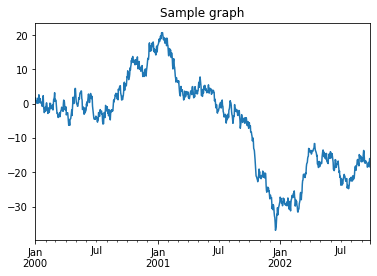

In [135]:
# Plot the cumsum now
ts.plot(title="Sample graph")

### Analysis
* We created a Series object with dates as the index
* The values of the Series are random values
* Then we obtained the cumulative sum
* Then applied the `plot()` function on the time series data (cumulative sum)
* Matplotlib has generated the default plot (line graph of the data)
* You can provide the title of the graph

### Plotting using DataFrame's data

**Create a DataFrame with index as dates and 4 columns**

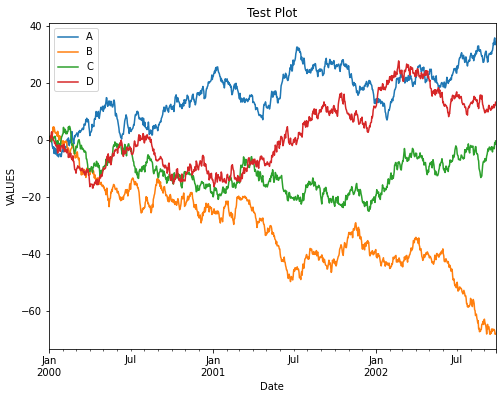

In [149]:
df = pd.DataFrame(np.random.randn(1000, 4),
     index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(figsize=(8,6))
plt.title("Test Plot")
plt.xlabel("Date")
plt.ylabel("VALUES")
plt.show()

### Analysis
* We created a Data Frame with 4 columns A, B, C, D
* The index of the data frame is date
* The values of the data frame are randomly generated
* Applied cumsum on all columns
* Then plotted the default plot
* Added the title, labels using `plt`. 

### Plotting between two columns explicitly

In [150]:
df['E'] = pd.Series(range(len(df)), index=df.index)

In [151]:
df.head()

,A,B,C,D,E
2000-01-01,0.715584,-0.233596,1.296139,-0.157829,0
2000-01-02,0.172478,0.560335,1.103605,-0.574894,1
2000-01-03,0.091355,0.216432,1.093083,0.207355,2
2000-01-04,0.944852,1.112821,1.219786,1.076109,3
2000-01-05,-0.459822,1.626024,0.177584,1.053109,4


Text(0, 0.5, 'D values')

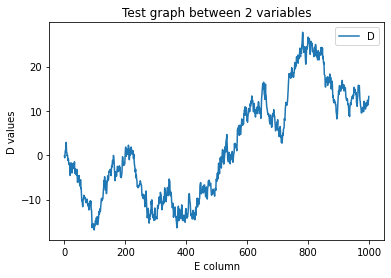

In [153]:
df.plot(x='E',y='D')
plt.title("Test graph between 2 variables")
plt.xlabel("E column")
plt.ylabel("D values")

### Various types of plots
* There are many types of plots you can plot. You provide the type of the plot using the `kind` option of `df.plot()` method. 
* Alternatively, we can use `df.plot.<Tab>` to display the available plots.

<AxesSubplot:>

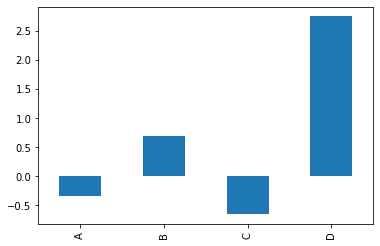

In [162]:
# Plot a bar chart using the 5th row index and the first 4 columns of the data frame
df.iloc[5,range(4)].plot.bar()

<AxesSubplot:xlabel='B', ylabel='C'>

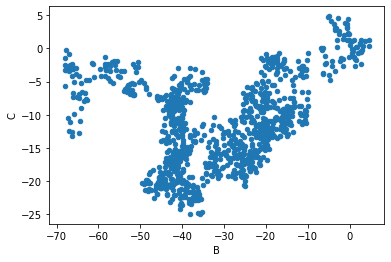

In [164]:
df.iloc[:,[1,2]].plot.scatter(x='B',y='C')

**Multiple plots on the same plot**

Let us plot multiple scatter plots on the same plot

<AxesSubplot:xlabel='C', ylabel='D'>

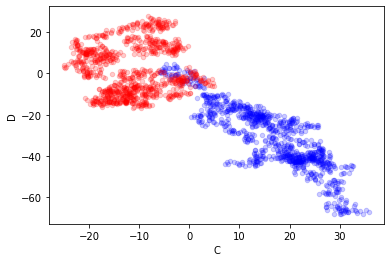

In [169]:
ax = df.plot.scatter(x='A',y='B', color="Blue", alpha=0.2)
df.plot.scatter(x='C', y='D', color="Red", ax=ax, alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

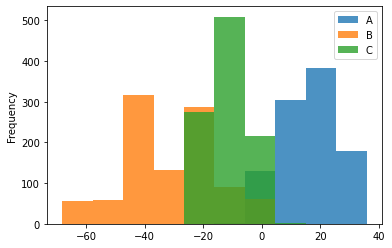

In [176]:
df.loc[:,['A','B','C']].plot.hist(alpha=0.8)

<AxesSubplot:ylabel='Frequency'>

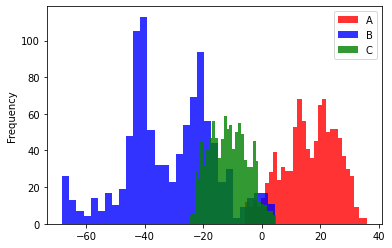

In [186]:
ax = df['A'].plot.hist(alpha=0.8, color="Red", legend=True,bins=30)
df['B'].plot.hist(alpha=0.8,ax=ax, color="Blue", legend=True,bins=30)
df['C'].plot.hist(alpha=0.8,ax=ax, color="Green", legend=True,bins=30)